In [49]:
import risspacker as riss

import vpython
from vpython import *

import numpy as np
from random import uniform

from matplotlib import rc
rc('text', usetex=False)
import matplotlib.pyplot as plt


<p>First we have to create a collection of rectangles to be packed. We do this by creating a RectCollection object
and filling it with rectangles by calling its append method with two arguments, a rectangle's width and height.
We sample rectangle dimensions using a uniform integer distribution between 1 and 100.</p>


In [2]:
rects = riss.RectCollection() 

for i in range (0, 500):
    rects.append(np.random.randint(0,101), np.random.randint(0,101))


<p>We can get the total area of all the rectangles we have added to the collection by calling its absolute value:</p>

In [3]:
print(abs(rects))

1318538.0


<p>Next we can pack the collection of rectangles into a set of square bins by injecting the rectangle collection
into a RISSPacker instance (named square).  
We choose the bin side length to be 1.5 in units of the maximum side length 
of all rectangles included in the collection. 
If we call the length of a RISSPacker instance we get the number of bins used, and if we call its absolute value we get the area
of the square that is formed from arranging the set of bins into the smallest square.
From these values we can calculate the packing fraction.</p>


In [4]:
square = riss.RISSPacker(rects.cpp_collection, 1.5)
print("nBins = ", len(square))
print("squareArea = ", abs(square))

fraction = abs(rects) / (len(square)*np.square(square.binDim()))
fractionSq = abs(rects) / abs(square)

print("packing fraction of the rectangles inside the bins = " , fraction)

print("packing fraction of the rectangles inside the large square = ", fractionSq)

nBins =  62
squareArea =  1440000.0
packing fraction of the rectangles inside the bins =  0.9451885304659499
packing fraction of the rectangles inside the large square =  0.9156513888888889


By packing the rectangles, RISSPacker places the set of square bins inside a large square.
This means we can nicely visualise our set of bins.
We can iterate through all the rectangles in the collection and draw them using visual python.
The following code block does generates a visual python scene.
You can hold alt and left click hold to move zoom into the canvas.
Hold shift and left click to strafe.

In [5]:
c = canvas()
for rect in rects:
    cylinder(pos=vector(rect.pos, rect.posY, 0), axis=vector(rect.width, 0, 0), radius=2,color=color.blue)
    cylinder(pos=vector(rect.pos, rect.posY, 0), axis=vector(0, rect.height, 0), radius=2,color=color.blue)
    cylinder(pos=vector(rect.pos + rect.width, rect.posY, 0), axis=vector(0, rect.height, 0), radius=2,color=color.blue)
    cylinder(pos=vector(rect.pos , rect.posY + rect.height, 0), axis=vector(rect.width, 0, 0), radius=2,color=color.blue)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

First let's delete the canvas before moving on..

In [6]:
canvas.delete(c)

A notable property of bin packing problems for shapes drawn from smooth distributions is that, as the number of shapes in a problem instance increases, it can become easier to pick good ways to pack the shapes well, since it becomes more likely that we will have a shape that fits nicely into a given gap.
Let's look at the distribution of packing fractions for instances of 10, 100, and 1000 rectangles, with dimensions drawn from the uniform distribution.  
First let's define functions for getting and plotting a distribution of bin packing fractions for a given instance and bin size.

In [50]:
def getDistDensity(nSamples, distPack, nRects, binSize):
    for i in range (0, nSamples):
        rects = riss.RectCollection() 
        for k in range (0, nRects):
            rects.append(np.random.randint(1, 1000), np.random.randint(1, 1000))
        square = riss.RISSPacker(rects.cpp_collection, binSize)
        fr = abs(rects) / (len(square) * square.binDim() * square.binDim())
        distPack[i][int(np.floor(fr * 100))] = 1 * 100
        
def graph(x,y,errBars,axes,labels,colourPlots):

    fig, ax = plt.subplots()

    for i in range (0,len(y)):
        ax.plot(x, y[i],colourPlots[i],linestyle='dashed',linewidth=1, markersize=7,label=labels[i])
        ax.errorbar(x, y[i], yerr=2*errBars[i], xerr=None, fmt='none', ecolor=colourPlots[i][:1], elinewidth=None, capsize=3, barsabove=False, lolims=False, uplims=False, xlolims=False, xuplims=False, errorevery=1, capthick=None, hold=None, data=None)
    
    ax.set_ylabel(ylabel=axes[1], fontsize=17)
    ax.set_xlabel(xlabel=axes[0], fontsize=17)
    plt.ylim(ymin=0)
    plt.xlim(xmin=0.0,xmax=1.0)

    ax.grid()
    ax.legend(prop={'size': 16})

    plt.show()

We will initially use square bins and the smallest possible bin size of one (in units of the maximum rectangle dimension in our collection).  The following code may take 10-20 seconds to execute.

In [8]:
nSamples1000 = 50
nSamples100 = 10000
nSamples10 = 20000
dist_1000 = np.zeros((nSamples1000,100))
dist_100 = np.zeros((nSamples100,100))
dist_10 = np.zeros((nSamples10,100))
index = np.empty(100)
for i in range (0,100):
    index[i] = i/100

getDistDensity(nSamples1000, dist_1000, 1000, 1.0)
getDistDensity(nSamples100, dist_100, 100, 1.0)
getDistDensity(nSamples10, dist_10, 10, 1.0)

Let's plot the probability distributions of the packing fraction:

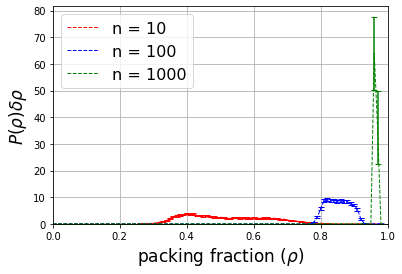

In [51]:
meanPlots = np.empty((3, 100))
errPlots = np.empty((3, 100))

meanPlots[0] = dist_10.mean(axis=0) 
meanPlots[1] = dist_100.mean(axis=0)
meanPlots[2] = dist_1000.mean(axis=0) 

errPlots[0] = dist_10.std(axis=0) / np.sqrt(nSamples10 - 1)
errPlots[1] = dist_100.std(axis=0) / np.sqrt(nSamples100 - 1)
errPlots[2] = dist_1000.std(axis=0) / np.sqrt(nSamples1000 - 1)

labelPlots = ['nRects = 10', 'nRects = 100','nRects = 1000']
colourPlots = ['r','b','g']
axes = ['packing fraction ($\\rho$)','$P(\\rho)\\delta \\rho$'] 
labelPlots = ['n = 10', 'n = 100','n = 1000']

graph(index, meanPlots, errPlots, axes, labelPlots, colourPlots)

Let's now see what happens if we increase the bin size to two in units of the maximum dimension:

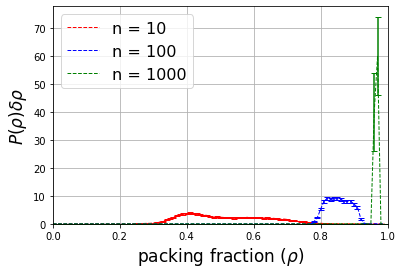

In [52]:
dist_1000 = np.zeros((nSamples1000, 100))
dist_100 = np.zeros((nSamples100, 100))
dist_10 = np.zeros((nSamples10, 100))

getDistDensity(nSamples1000, dist_1000, 1000, 2.0)
getDistDensity(nSamples100, dist_100, 100, 2.0)
getDistDensity(nSamples10, dist_10, 10, 2.0)

meanPlots[0] = dist_10.mean(axis=0) 
meanPlots[1] = dist_100.mean(axis=0)
meanPlots[2] = dist_1000.mean(axis=0) 

errPlots[0] = dist_10.std(axis=0) / np.sqrt(nSamples10 - 1)
errPlots[1] = dist_100.std(axis=0) / np.sqrt(nSamples100 - 1)
errPlots[2] = dist_1000.std(axis=0) / np.sqrt(nSamples1000 - 1)

graph(index, meanPlots, errPlots, axes, labelPlots, colourPlots)

We see that the distributions become wider for the instances comprising 10 and 100 rectangles compared to the small bin dimension case.  The packing fraction of the smallest instances generally decreases whereas for the larger instances the packing fraction increases.

We can use RISSPacker to pack a very large number of rectangles into a single square given a solution to the bin packing problem for a set of smaller squares, by packing the resultant square bins into a larger square.  We have seen above that for a large number of rectangles the bin packing problem packing fraction tends to increase as the size of the bins increases.  However some of the distribution will be penalised if the inner bins are too large. Using a bin dimension of three is a good compromise.  Let's pack a million rectangles into a single smallest square:

In [53]:
millionRects = riss.RectCollection() 

for i in range (0, 1000000):
    millionRects.append(np.random.randint(1,1000), np.random.randint(1,1000))

square1 = riss.RISSPacker(millionRects.cpp_collection, 3)

fraction = abs(millionRects) / (len(square1)*square1.binDim()*square1.binDim())
fractionSq = abs(millionRects)/abs(square1)

print("packing fraction of bins = ")
print(fraction)

print("packing fraction of large square = ")
print(fractionSq)

packing fraction of bins = 
0.9968177344302499
packing fraction of large square = 
0.9854099880604261


The packing fraction is close to one. Now we can ask the question of whether we can find a smaller square by selecting a bin size smaller than that output by the last packing.  If this is the case then the number of bins will be only one.  Let's see!

In [101]:
sideLength = np.ceil(np.sqrt(len(square1))) * 3
print(sideLength)
sq = riss.RISSPacker(millionRects.cpp_collection, sideLength - 1)

fraction = abs(millionRects) / (len(sq) * sq.binDim() * sq.binDim())
fractionSq = abs(millionRects)/abs(sq)

print("packing fraction of bins = ")
print(fraction)

print("packing fraction of large square = ")
print(fractionSq)

print(len(sq))

504.0
packing fraction of bins = 
0.9893320177347273
packing fraction of large square = 
0.9893320435667375
1


It seems that we can often find a smaller single square than the 'small squares' method whereby we solve the bin packing problem using small bins and arrange this set of small bins into a smallest 'large' square.  The small squares method is also not much good for us as a first method to find an upper bound for instances with very large numbers of rectangles, since the FFD method we use can find a solution with packing fraction very close to one.
However consider the following question:

Can we get a more optimal packing fraction  by constraining the small squares method such that only a square number of bins gives a valid result.  To be precise, consider whether there exists a better solution using 4, 9, 16.... bins rather than a single bin.

Have a play if you are interested!